In [11]:
import pandas as pd
import numpy as np
import iexfinance
from iexfinance.stocks import get_historical_data
from datetime import datetime, date

In [12]:
#pip install iexfinance

In [13]:
price_df=pd.read_csv("static/data/BBG_price_data.csv")
price_df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
0,1/4/2010,418.50,557.75,1049.50,76.00,85.375
1,1/5/2010,418.75,553.00,1052.25,73.12,86.325
2,1/6/2010,421.75,567.25,1050.50,73.55,85.950
3,1/7/2010,417.50,557.75,1017.75,72.89,85.925
4,1/8/2010,423.00,568.50,1013.00,72.44,85.825
...,...,...,...,...,...,...
2896,7/2/2021,697.25,645.75,1451.75,86.03,122.000
2897,7/6/2021,656.00,620.00,1363.75,86.38,122.400
2898,7/7/2021,652.50,614.75,1386.50,86.63,120.600
2899,7/8/2021,638.00,612.25,1390.25,85.88,119.275


In [15]:
price_df.dtypes

Date              object
Corn Price       float64
Wheat Price      float64
Soybean Price    float64
Cotton Price     float64
Live Cattle      float64
dtype: object

In [24]:
price_df["Date"]=pd.to_datetime(price_df.Date,format='%m/%d/%Y')
price_df.index=price_df["Date"]


In [27]:
price_df.dtypes

Date             datetime64[ns]
Corn Price              float64
Wheat Price             float64
Soybean Price           float64
Cotton Price            float64
Live Cattle             float64
dtype: object

In [26]:
price_df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
Date,,,,,,
2010-01-04,2010-01-04,418.50,557.75,1049.50,76.00,85.375
2010-01-05,2010-01-05,418.75,553.00,1052.25,73.12,86.325
2010-01-06,2010-01-06,421.75,567.25,1050.50,73.55,85.950
2010-01-07,2010-01-07,417.50,557.75,1017.75,72.89,85.925
2010-01-08,2010-01-08,423.00,568.50,1013.00,72.44,85.825
...,...,...,...,...,...,...
2021-07-02,2021-07-02,697.25,645.75,1451.75,86.03,122.000
2021-07-06,2021-07-06,656.00,620.00,1363.75,86.38,122.400
2021-07-07,2021-07-07,652.50,614.75,1386.50,86.63,120.600


Text(0.5, 1.0, 'Corn Price')

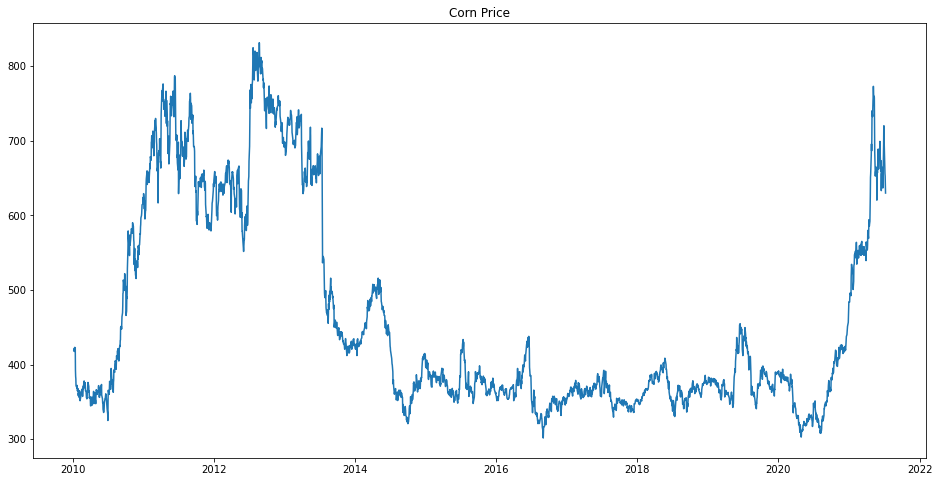

In [32]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Corn Price"],label='Close Price history')
plt.title("Corn Price")

Text(0.5, 1.0, 'Wheat Price')

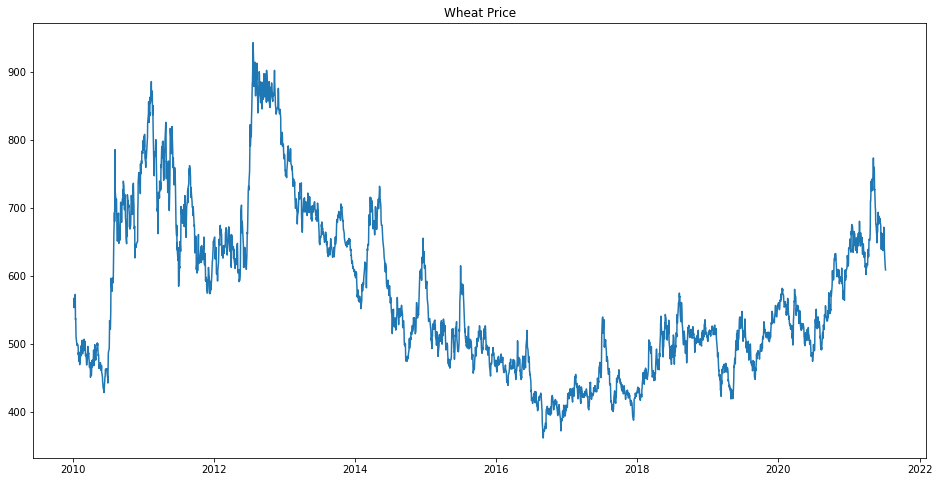

In [33]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Wheat Price"],label='Close Price history')
plt.title("Wheat Price")

Text(0.5, 1.0, 'Soybean Price')

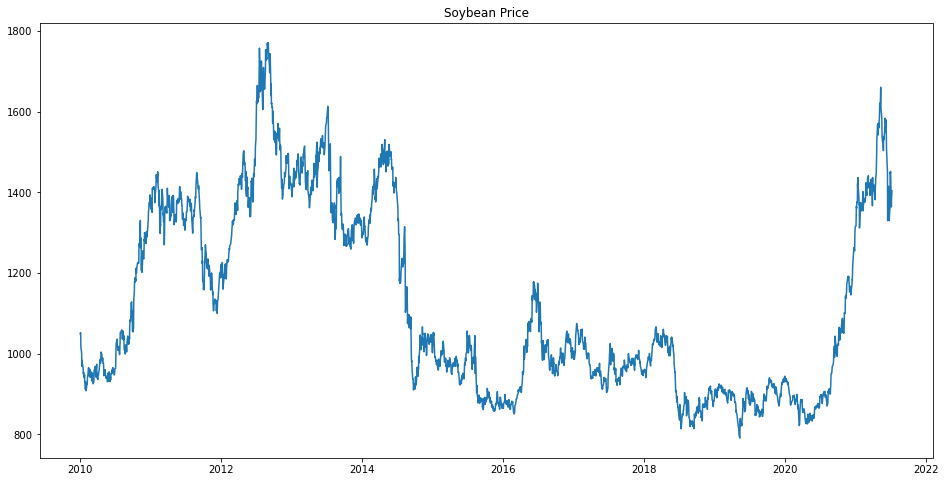

In [34]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Soybean Price"],label='Close Price history')
plt.title("Soybean Price")

Text(0.5, 1.0, 'Cotton Price')

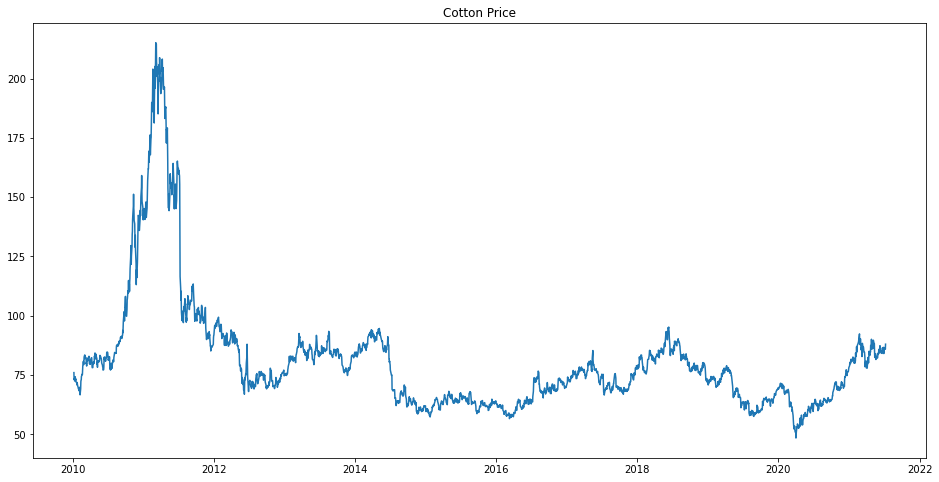

In [35]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Cotton Price"],label='Close Price history')
plt.title("Cotton Price")

Text(0.5, 1.0, 'Live Cattle Price')

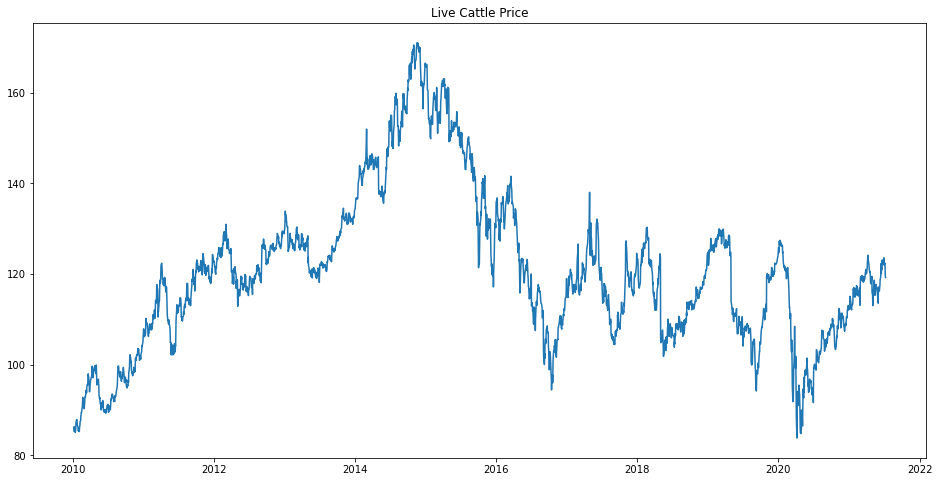

In [37]:
plt.figure(figsize=(16,8))
plt.plot(price_df["Live Cattle"],label='Close Price history')
plt.title("Live Cattle Price")